In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [3]:
import pandas as pd,seaborn as sns,numpy as np

In [4]:
data_train=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [5]:
data_test=pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [6]:
pd.set_option('display.max_columns',len(data_train.columns))

### EDA and FE
* we will be doing eda and fe separately for train and test data 
* for each step of exploration and transformation of training data we will use fuction so we can easily implement it later in test data 

In [7]:
def check_null(df):
    for i,j in zip(df.isnull().sum().index,df.isnull().sum().values):
        if j!=0:
            k=print(i,j)
    return k

In [8]:
data_train.duplicated().sum()

0

In [9]:
def check_corr():
    for i,j in zip(data_train.corr()['SalePrice'],data_train.corr()['SalePrice'].index):
         if abs(i)>0.10:
                k=(j,round(i,2))
    return k

In [10]:
check_corr()

('SalePrice', 1.0)

In [11]:
#data_train.corr()['SalePrice'][data_train.corr()['SalePrice']>abs(0.10)]

In [12]:
data_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

## Feature Engineering

In [13]:
df=data_train.copy()

In [14]:
cat_null=[i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype=='O']
    

In [15]:
cat_null

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [16]:
for i in cat_null:
    print(f'{i}:{np.round(df[i].isnull().mean(),4)}% missing values')

Alley:0.9377% missing values
MasVnrType:0.0055% missing values
BsmtQual:0.0253% missing values
BsmtCond:0.0253% missing values
BsmtExposure:0.026% missing values
BsmtFinType1:0.0253% missing values
BsmtFinType2:0.026% missing values
Electrical:0.0007% missing values
FireplaceQu:0.4726% missing values
GarageType:0.0555% missing values
GarageFinish:0.0555% missing values
GarageQual:0.0555% missing values
GarageCond:0.0555% missing values
PoolQC:0.9952% missing values
Fence:0.8075% missing values
MiscFeature:0.963% missing values


In [17]:
#function to fill nan values in categorical columns with a label 'missing'
def replace_cat_null(df,col):
    df1=df.copy()
    df1[cat_null]=df1[cat_null].fillna('missing')
    return df1

In [18]:
df=replace_cat_null(df,cat_null)

In [19]:
df[cat_null].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [20]:
num_null=[i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype!='O']

In [21]:
for i in num_null:
    print(f'{i} {np.round(df[i].isnull().mean(),4)}% missing values')

LotFrontage 0.1774% missing values
MasVnrArea 0.0055% missing values
GarageYrBlt 0.0555% missing values


<AxesSubplot:ylabel='Frequency'>

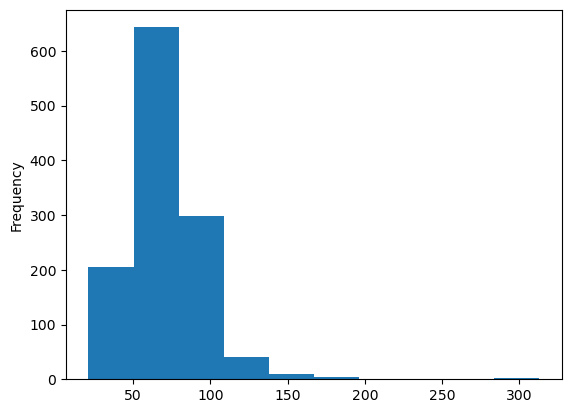

In [22]:
df['LotFrontage'].plot(kind='hist') 

<AxesSubplot:ylabel='Frequency'>

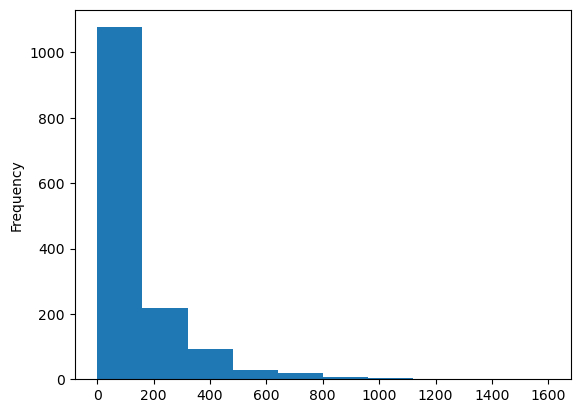

In [23]:
df['MasVnrArea'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

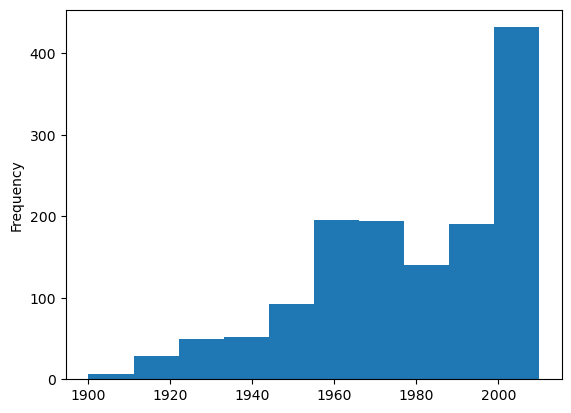

In [24]:
df['GarageYrBlt'].plot(kind='hist')

### observation-before filling the missing values
* LotFrontage -right skewed
* MasVnrArea -right skewed
* GarageYrBlt -left skewed

In [35]:
def replace_num_null(df,col_list):
    for i in col_list:
        median_val=df[i].median()
        df[i+'nan']=np.where(df[i].isnull(),1,0)
        df[i].fillna(median_val,inplace=True)

In [37]:
replace_num_null(df,num_null)

In [38]:
df[num_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [28]:
#df.MasVnrArea.describe()

In [29]:
import re
pattern=re.compile(r'year|Year|Yr|yr')
year_col=[]
for i in df.columns:
    if pattern.findall((i)) and i!='GarageYrBltnan':
        year_col.append(i)

In [30]:
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [31]:
for i in year_col:
    if i!= 'YrSold':
        df[i]=df['YrSold']-df[i]

In [32]:
df[year_col]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


* Since the numerical feature seems to be skewed .we will use log transformation to achieve normal distribution.

In [66]:
num_col=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']


In [68]:
for i in num_col:
    df[i]=np.log(df[i])

In [69]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216,0,0,0


###  Now we will handle the categorical 
*    first reduce the categories by replacing the less frequent values to 'rare'
*    then encode the categories .

In [70]:
cat_col=[i for i in df.columns if df[i].dtype=='O']

In [75]:
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [84]:
for i in cat_col:
    temp=df.groupby(i)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[i]=np.where(df[i].isin (temp_df),df[i],'rare_var')
    

In [ ]:
l={k:i for i ,k in enumerate(,0)}


In [95]:
for i in cat_col:
    labels_or=df.groupby([i])['SalePrice'].mean().sort_values().index
    labels_or={k:i for i ,k in enumerate(labels_or,0)}
    df[i]=df[i].map(labels_or)

In [101]:
#df.dtypes[df.dtypes=='O']

Series([], dtype: object)